# DataAnalysis

In [383]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import ttest_ind

data = pd.read_csv('data.csv', delimiter=';')

## Time Metric

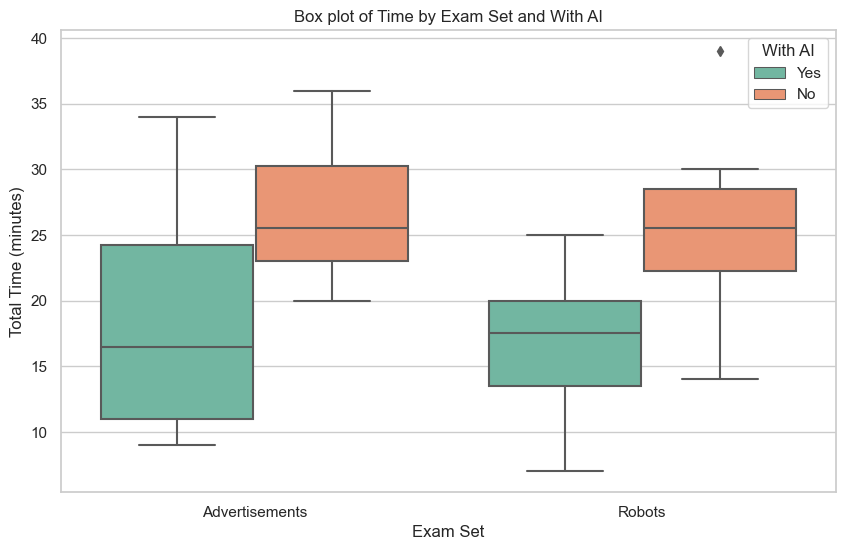

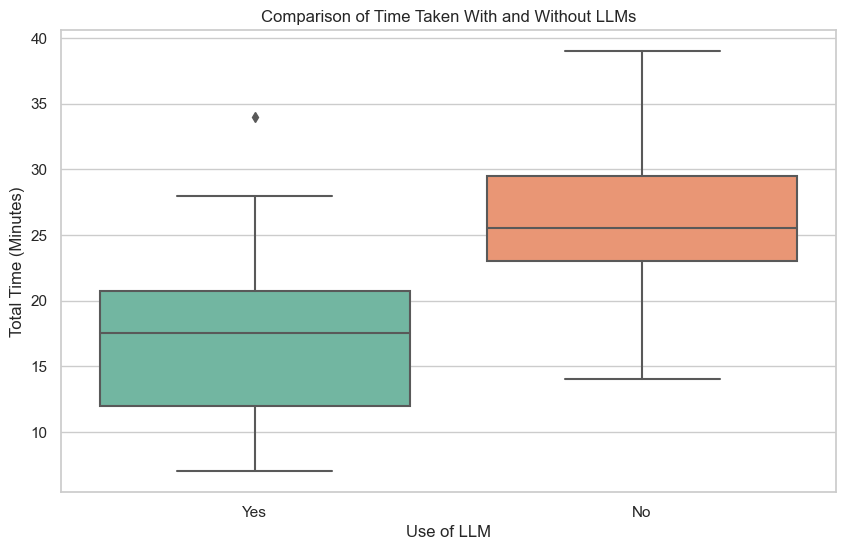

In [384]:
# Define a function to calculate total time spent
def calculate_total_time(row):
    total_time = 0
    for task in row:
        if isinstance(task, str):
            parts = task.split(' ')  # Split based on space to separate time and binary indicator
            if len(parts) == 2:
                time_str = parts[0]  # Time is always the first part
            else:
                time_str = task  # Handle case where there's only a time value
            total_time += int(time_str)
    return total_time

task_columns = data.iloc[:, 3:11]

# Adjusted function applications to the correct column slice
data['Total_Time'] = task_columns.apply(calculate_total_time, axis=1)

# Convert total time from seconds to minutes and round
data['Total_Time_Minutes'] = (data['Total_Time'] / 60).round(0)

# Filter the DataFrame to include only rows where 'With AI' is 'Yes' or 'No'
data_with_ai = data[data['With AI'] == 'Yes']

data_filtered = data[data['With AI'].isin(['Yes', 'No'])]

# Create box plots for time
plt.figure(figsize=(10, 6))
sns.boxplot(x='Exam Set', y='Total_Time_Minutes', hue='With AI', data=data_filtered,
            palette='Set2')  # Apply custom colors
plt.title('Box plot of Time by Exam Set and With AI')
plt.xlabel('Exam Set')
plt.ylabel('Total Time (minutes)')
plt.legend(title='With AI')  # Optional: to add a title to the legend
plt.show()

# Create box plots for comparison of time taken with and without LLMs
plt.figure(figsize=(10, 6))
sns.boxplot(x='With AI', y='Total_Time_Minutes', data=data,
            palette='Set2')  # Apply custom colors
plt.title('Comparison of Time Taken With and Without LLMs')
plt.xlabel('Use of LLM')
plt.ylabel('Total Time (Minutes)')
plt.show()

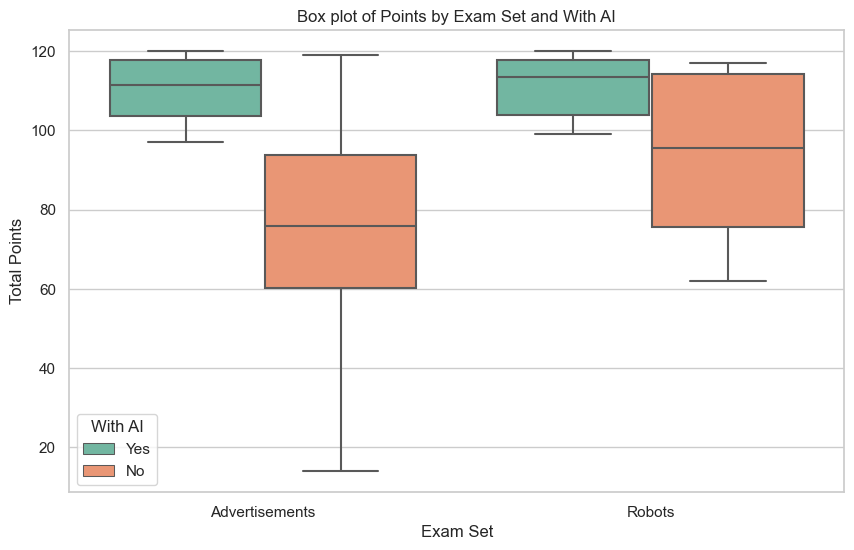

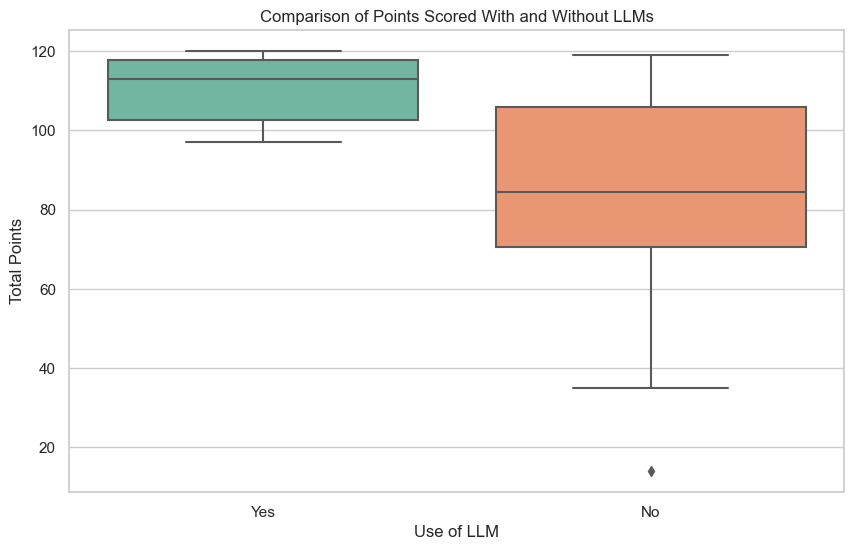

In [385]:
# Assuming 'Total Points' column is correctly calculated and exists in your dataframe
# Create box plots for points
plt.figure(figsize=(10, 6))
sns.boxplot(x='Exam Set', y='Total Points', hue='With AI', data=data_filtered,
            palette='Set2')  # Apply custom colors
plt.title('Box plot of Points by Exam Set and With AI')
plt.xlabel('Exam Set')
plt.ylabel('Total Points')
plt.legend(title='With AI')  # Add a title to the legend for clarity
plt.show()

# Create box plots for comparison of points scored with and without LLMs
plt.figure(figsize=(10, 6))
sns.boxplot(x='With AI', y='Total Points', data=data,
            palette='Set2')  # Apply custom colors
plt.title('Comparison of Points Scored With and Without LLMs')
plt.xlabel('Use of LLM')
plt.ylabel('Total Points')
plt.show()


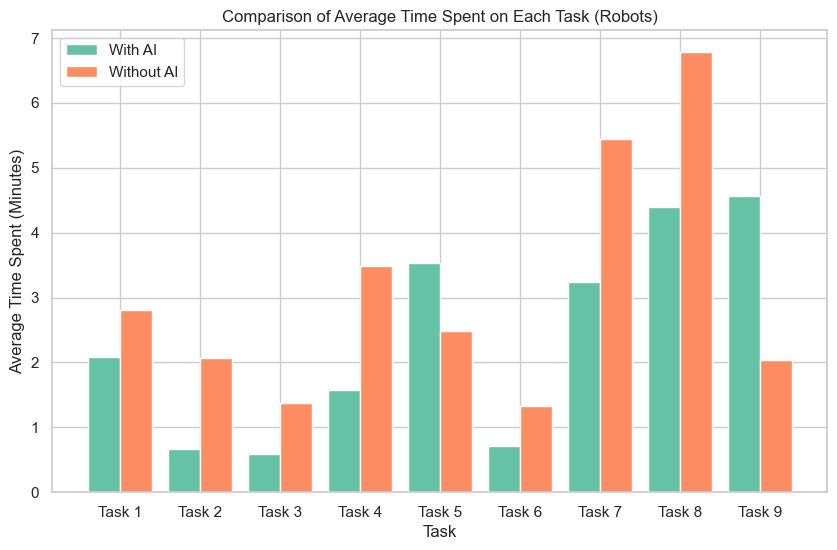

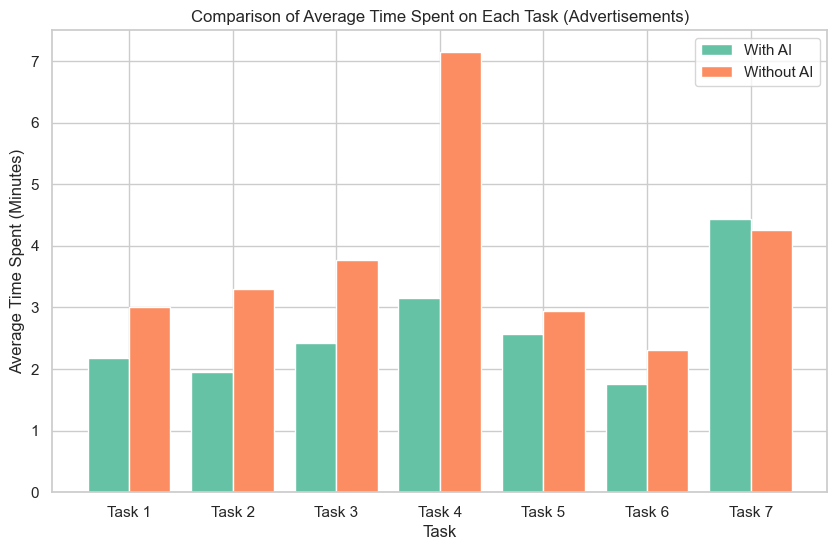

In [386]:
# Set the color palette to 'Set2'
sns.set_palette("Set2")

# Function to calculate average time spent per task
def calculate_average_time(task_series):
    total_time = 0
    count = 0
    for task in task_series:
        if pd.isna(task):  # Skip NaN values
            continue
        parts = task.split(' ')
        if len(parts) == 2:
            time_str = parts[0]
        else:
            time_str = task
        total_time += int(time_str)
        count += 1
    if count == 0:
        return np.nan  # Avoid division by zero
    return total_time / count / 60  # Convert to minutes

# Apply the function to calculate average time spent per task for both sets
avg_time_with_ai_robots = data[(data['With AI'] == 'Yes') & (data['Exam Set'] == 'Robots')].iloc[:, 3:12].apply(calculate_average_time, axis=0)
avg_time_without_ai_robots = data[(data['With AI'] == 'No') & (data['Exam Set'] == 'Robots')].iloc[:, 3:12].apply(calculate_average_time, axis=0)

avg_time_with_ai_ads = data[(data['With AI'] == 'Yes') & (data['Exam Set'] == 'Advertisements')].iloc[:, 3:10].apply(calculate_average_time, axis=0)  # Only tasks 1-7
avg_time_without_ai_ads = data[(data['With AI'] == 'No') & (data['Exam Set'] == 'Advertisements')].iloc[:, 3:10].apply(calculate_average_time, axis=0)  # Only tasks 1-7

# Extract task names
task_names_robots = [f'Task {i}' for i in range(1, 10)]
task_names_ads = [f'Task {i}' for i in range(1, 8)]  # Only tasks 1-7

# Plot for Robots
plt.figure(figsize=(10, 6))
plt.bar([i - 0.2 for i in range(1, 10)], avg_time_with_ai_robots, width=0.4, label='With AI')
plt.bar([i + 0.2 for i in range(1, 10)], avg_time_without_ai_robots, width=0.4, label='Without AI')
plt.xlabel('Task')
plt.ylabel('Average Time Spent (Minutes)')
plt.title('Comparison of Average Time Spent on Each Task (Robots)')
plt.xticks(range(1, 10), task_names_robots)
plt.legend()
plt.show()

# Plot for Advertisements
plt.figure(figsize=(10, 6))
plt.bar([i - 0.2 for i in range(1, 8)], avg_time_with_ai_ads, width=0.4, label='With AI')
plt.bar([i + 0.2 for i in range(1, 8)], avg_time_without_ai_ads, width=0.4, label='Without AI')
plt.xlabel('Task')
plt.ylabel('Average Time Spent (Minutes)')
plt.title('Comparison of Average Time Spent on Each Task (Advertisements)')
plt.xticks(range(1, 8), task_names_ads)  # Use the task names for tasks 1-7
plt.legend()
plt.show()


## Split data for each exam set

In [387]:
robots_with_ai = data.loc[(data['Exam Set'] == 'Robots') & (data['With AI'] == 'Yes')]

robots_without_ai = data.loc[(data['Exam Set'] == 'Robots') & (data['With AI'] == 'No')]

ads_with_ai = data.loc[(data['Exam Set'] == 'Advertisements') & (data['With AI'] == 'Yes')]

ads_without_ai = data.loc[(data['Exam Set'] == 'Advertisements') & (data['With AI'] == 'No')]

In [388]:
total_time_with_ai_robots = robots_with_ai['Total_Time_Minutes'].sum()
total_time_without_ai_robots = robots_without_ai['Total_Time_Minutes'].sum()

total_time_with_ai_ads = ads_with_ai['Total_Time_Minutes'].sum()
total_time_without_ai_ads = ads_without_ai['Total_Time_Minutes'].sum()

# Calculate the percentage difference for each category
percent_difference_robots = (((total_time_without_ai_robots - total_time_with_ai_robots) / total_time_with_ai_robots) * 100).round(2)
percent_difference_ads = (((total_time_without_ai_ads - total_time_with_ai_ads) / total_time_with_ai_ads) * 100).round(2)

print("Total time spent on Robots without AI:", total_time_without_ai_robots, "minutes")
print("Total time spent on Robots with AI:", total_time_with_ai_robots, "minutes")
print("Total time used on tasks without AI in Robots are", percent_difference_robots, "% longer than with AI")

print("\nTotal time spent on Advertisements without AI:", total_time_without_ai_ads, "minutes")
print("Total time spent on Advertisements with AI:", total_time_with_ai_ads, "minutes")
print("Total time used on tasks without AI in Advertisements are", percent_difference_ads, "% longer than with AI")



Total time spent on Robots without AI: 302.0 minutes
Total time spent on Robots with AI: 168.0 minutes
Total time used on tasks without AI in Robots are 79.76 % longer than with AI

Total time spent on Advertisements without AI: 263.0 minutes
Total time spent on Advertisements with AI: 217.0 minutes
Total time used on tasks without AI in Advertisements are 21.2 % longer than with AI


## Statistical significant for time metric

In [389]:
# For robots with AI
times_with_ai_robots = data[(data['With AI'] == 'Yes') & (data['Exam Set'] == 'Robots')]['Total_Time_Minutes'].values

# For robots without AI
times_without_ai_robots = data[(data['With AI'] == 'No') & (data['Exam Set'] == 'Robots')]['Total_Time_Minutes'].values

# Conduct the t-test
t_stat, p_value = ttest_ind(times_with_ai_robots, times_without_ai_robots)

print(f"T-statistic for exam set with Robots: {t_stat}, P-value: {p_value}")

# For robots with AI
times_with_ai_adv = data[(data['With AI'] == 'Yes') & (data['Exam Set'] == 'Advertisements')]['Total_Time_Minutes'].values

# For robots without AI
times_without_ai_adv = data[(data['With AI'] == 'No') & (data['Exam Set'] == 'Advertisements')]['Total_Time_Minutes'].values

# Conduct the t-test
t_stat, p_value = ttest_ind(times_with_ai_adv, times_without_ai_adv)

print(f"T-statistic for exam set with Advertisements: {t_stat}, P-value: {p_value}")

T-statistic for exam set with Robots: -3.2140023131734092, P-value: 0.004354741375411098
T-statistic for exam set with Advertisements: -2.7124971785843983, P-value: 0.013406047111066284


## Code correctness metric

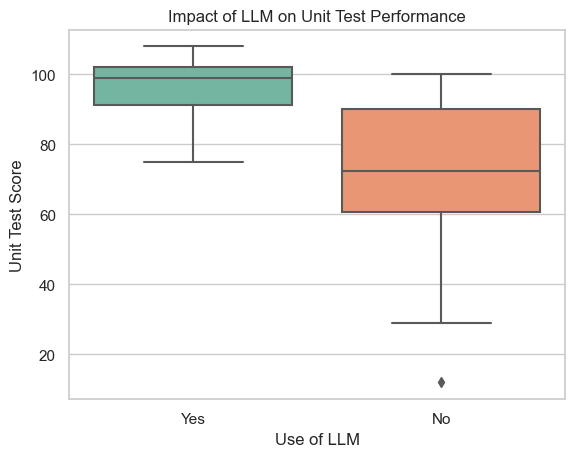

In [390]:
sns.boxplot(data=data, x='With AI', y='Unit Test', palette='Set2')
plt.title('Impact of LLM on Unit Test Performance')
plt.xlabel('Use of LLM')
plt.ylabel('Unit Test Score')  # Assuming 'Unit Test Score' is the intended meaning
plt.show()

## Prompt metric

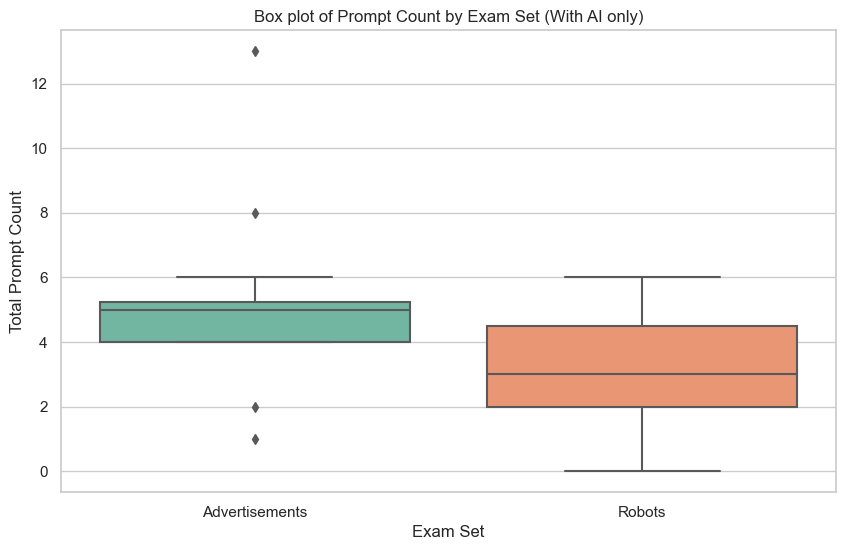

In [391]:
# Set the color palette to 'Set2'
sns.set_palette("Set2")

# Define a function to calculate total prompt count
def calculate_total_prompt(row):
    total_prompt = 0
    for task in row:
        if isinstance(task, str):
            parts = task.split(' ')  # Split based on space to separate time and binary indicator
            if len(parts) == 2:
                prompt_str = parts[1]  # Binary indicator (prompt) is the second part
                total_prompt += int(prompt_str)
    return total_prompt

task_columns = data.iloc[:, 3:11]

data['Total_Prompt_Count'] = task_columns.apply(calculate_total_prompt, axis=1)

# Filter the DataFrame to include only rows where 'With AI' is 'Yes' or 'No'
data_with_ai = data[data['With AI'] == 'Yes']

data_filtered = data[data['With AI'].isin(['Yes', 'No'])]

# Create box plots for prompt count for exams with AI
plt.figure(figsize=(10, 6))
sns.boxplot(x='Exam Set', y='Total_Prompt_Count', data=data_with_ai, palette='Set2')  # Use Set2 palette
plt.title('Box plot of Prompt Count by Exam Set (With AI only)')
plt.xlabel('Exam Set')
plt.ylabel('Total Prompt Count')
plt.show()


## Points per task

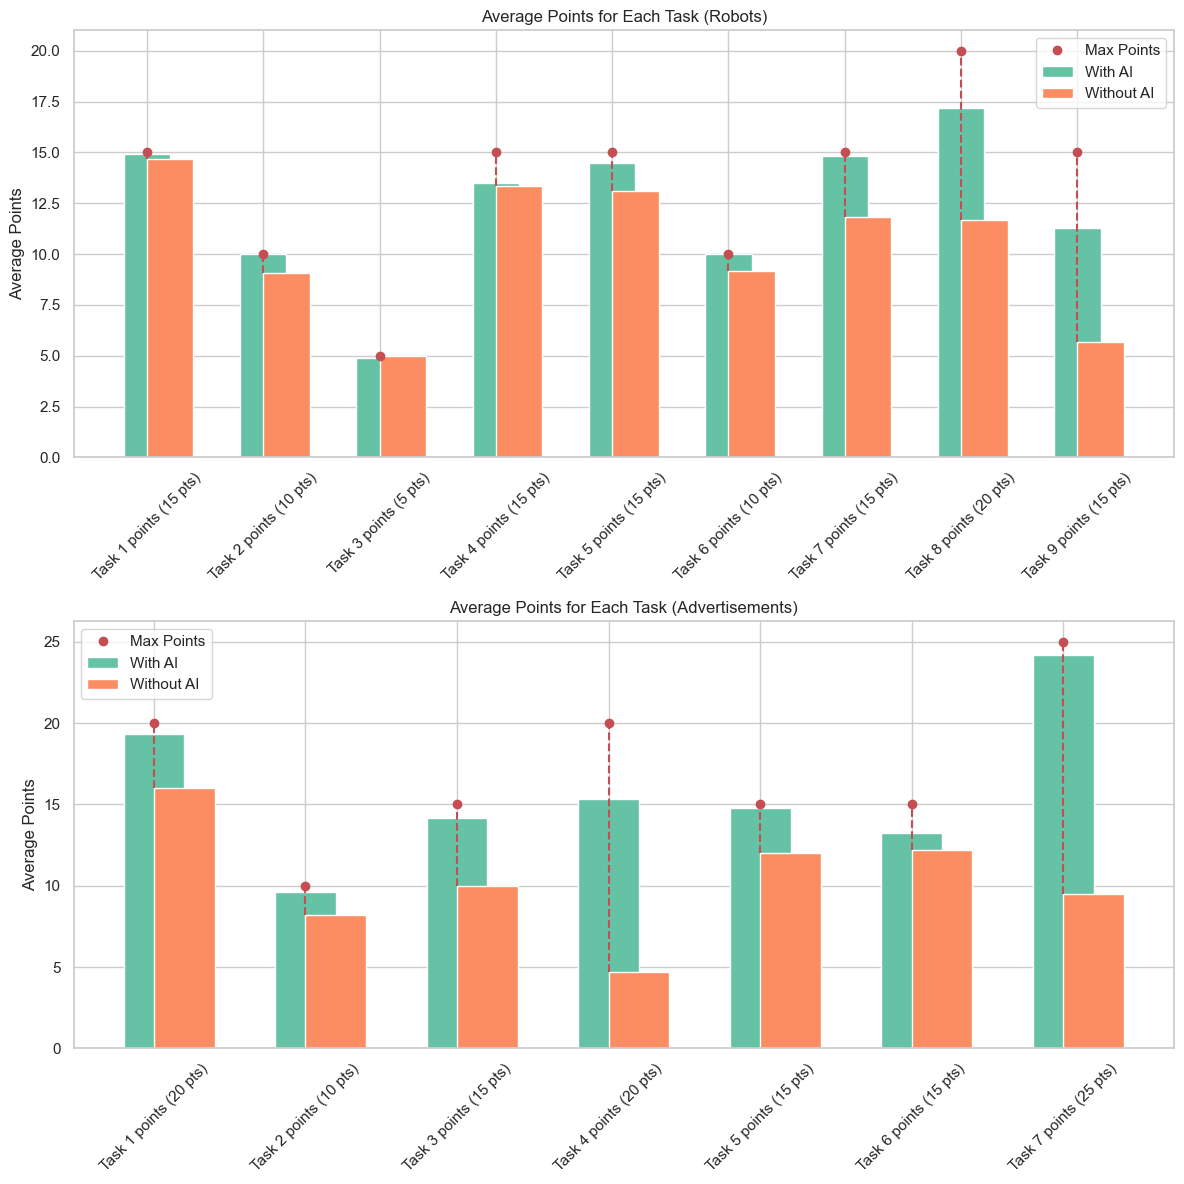

In [392]:
# Define specific colors from the Set2 palette
colors = sns.color_palette("Set2")[0:2]  # Select the first two colors from the Set2 palette

# Filtering data for each set
data_with_ai_robots = data[(data['With AI'] == 'Yes') & (data['Exam Set'] == 'Robots')]
data_without_ai_robots = data[(data['With AI'] == 'No') & (data['Exam Set'] == 'Robots')]
data_with_ai_ads = data[(data['With AI'] == 'Yes') & (data['Exam Set'] == 'Advertisements')]
data_without_ai_ads = data[(data['With AI'] == 'No') & (data['Exam Set'] == 'Advertisements')]

# Assuming tasks are from Task 1 to Task 9 for Robots and Task 1 to Task 7 for Advertisements
task_columns_robots = ['Task 1 points', 'Task 2 points', 'Task 3 points', 'Task 4 points', 'Task 5 points', 'Task 6 points', 'Task 7 points', 'Task 8 points', 'Task 9 points']
task_columns_adv = ['Task 1 points', 'Task 2 points', 'Task 3 points', 'Task 4 points', 'Task 5 points', 'Task 6 points', 'Task 7 points']

# Calculating averages
avg_points_with_ai_robots = data_with_ai_robots[task_columns_robots].mean()
avg_points_without_ai_robots = data_without_ai_robots[task_columns_robots].mean()
avg_points_with_ai_ads = data_with_ai_ads[task_columns_adv].mean()
avg_points_without_ai_ads = data_without_ai_ads[task_columns_adv].mean()

# Maximum points for each task
max_points_per_task_robots = [15, 10, 5, 15, 15, 10, 15, 20, 15]
max_points_per_task_advertisement = [20, 10, 15, 20, 15, 15, 25]

# Plotting
fig, axs = plt.subplots(2, 1, figsize=(12, 12))

# Function to add max points to plots
def add_max_points(ax, task_columns, avg_with_ai, avg_without_ai, max_points):
    for i, task in enumerate(task_columns):
        ax.bar(task, avg_with_ai[i], width=0.4, label='With AI' if i == 0 else "", color=colors[0], align='center')
        ax.bar(task, avg_without_ai[i], width=0.4, label='Without AI' if i == 0 else "", color=colors[1], align='edge')
        ax.plot([i], [max_points[i]], 'ro', label='Max Points' if i == 0 else "")  # Only label once
        ax.vlines(i, ymin=min(avg_with_ai[i], avg_without_ai[i]), ymax=max_points[i], color='r', linestyle='--')

# Robots
add_max_points(axs[0], task_columns_robots, avg_points_with_ai_robots, avg_points_without_ai_robots, max_points_per_task_robots)
axs[0].set_ylabel('Average Points')
axs[0].set_title('Average Points for Each Task (Robots)')
axs[0].legend()

# Advertisements
add_max_points(axs[1], task_columns_adv, avg_points_with_ai_ads, avg_points_without_ai_ads, max_points_per_task_advertisement)
axs[1].set_ylabel('Average Points')
axs[1].set_title('Average Points for Each Task (Advertisements)')
axs[1].legend()

# Custom x-axis labels with max points
axs[0].set_xticks(range(len(task_columns_robots)))
axs[0].set_xticklabels([f"{tc} ({mp} pts)" for tc, mp in zip(task_columns_robots, max_points_per_task_robots)], rotation=45)
axs[1].set_xticks(range(len(task_columns_adv)))
axs[1].set_xticklabels([f"{tc} ({mp} pts)" for tc, mp in zip(task_columns_adv, max_points_per_task_advertisement)], rotation=45)

plt.tight_layout()
plt.show()


In [393]:
# Filtering data for each set
data_with_ai_robots = data[(data['With AI'] == 'Yes') & (data['Exam Set'] == 'Robots')]
data_without_ai_robots = data[(data['With AI'] == 'No') & (data['Exam Set'] == 'Robots')]
data_with_ai_ads = data[(data['With AI'] == 'Yes') & (data['Exam Set'] == 'Advertisements')]
data_without_ai_ads = data[(data['With AI'] == 'No') & (data['Exam Set'] == 'Advertisements')]

# Task columns as provided
task_columns_robots = ['Task 1 points', 'Task 2 points', 'Task 3 points', 'Task 4 points', 'Task 5 points', 'Task 6 points', 'Task 7 points', 'Task 8 points', 'Task 9 points']
task_columns_adv = ['Task 1 points', 'Task 2 points', 'Task 3 points', 'Task 4 points', 'Task 5 points', 'Task 6 points', 'Task 7 points']

# Maximum points for each task
max_points_per_task_robots = [15, 10, 5, 15, 15, 10, 15, 20, 15]
max_points_per_task_advertisement = [20, 10, 15, 20, 15, 15, 25]

# Function to generate the comparison results
def generate_comparison_results(with_ai_data, without_ai_data, tasks, max_points):
    results = []
    for i, task in enumerate(tasks):
        with_ai_points = with_ai_data[task].mean()
        without_ai_points = without_ai_data[task].mean()
        difference = with_ai_points - without_ai_points
        results.append({
            'Task': task.replace(' points', ''),
            'Without AI': round(without_ai_points, 2),
            'With AI': round(with_ai_points, 2),
            'Difference': round(difference, 2),
            'Max Points': max_points[i]
        })
    return results

# Generate comparison results for Robots and Advertisements
comparison_results_robots = generate_comparison_results(data_with_ai_robots, data_without_ai_robots, task_columns_robots, max_points_per_task_robots)
comparison_results_advertisements = generate_comparison_results(data_with_ai_ads, data_without_ai_ads, task_columns_adv, max_points_per_task_advertisement)

# Print the results directly (or integrate into your tables)
print("Robots Tasks Points Comparison:")
for result in comparison_results_robots:
    print(result)

print("\nAdvertisements Tasks Points Comparison:")
for result in comparison_results_advertisements:
    print(result)


Robots Tasks Points Comparison:
{'Task': 'Task 1', 'Without AI': 14.67, 'With AI': 14.9, 'Difference': 0.23, 'Max Points': 15}
{'Task': 'Task 2', 'Without AI': 9.08, 'With AI': 10.0, 'Difference': 0.92, 'Max Points': 10}
{'Task': 'Task 3', 'Without AI': 5.0, 'With AI': 4.9, 'Difference': -0.1, 'Max Points': 5}
{'Task': 'Task 4', 'Without AI': 13.33, 'With AI': 13.5, 'Difference': 0.17, 'Max Points': 15}
{'Task': 'Task 5', 'Without AI': 13.08, 'With AI': 14.5, 'Difference': 1.42, 'Max Points': 15}
{'Task': 'Task 6', 'Without AI': 9.17, 'With AI': 10.0, 'Difference': 0.83, 'Max Points': 10}
{'Task': 'Task 7', 'Without AI': 11.83, 'With AI': 14.8, 'Difference': 2.97, 'Max Points': 15}
{'Task': 'Task 8', 'Without AI': 11.67, 'With AI': 17.2, 'Difference': 5.53, 'Max Points': 20}
{'Task': 'Task 9', 'Without AI': 5.67, 'With AI': 11.3, 'Difference': 5.63, 'Max Points': 15}

Advertisements Tasks Points Comparison:
{'Task': 'Task 1', 'Without AI': 16.0, 'With AI': 19.33, 'Difference': 3.33, 'M

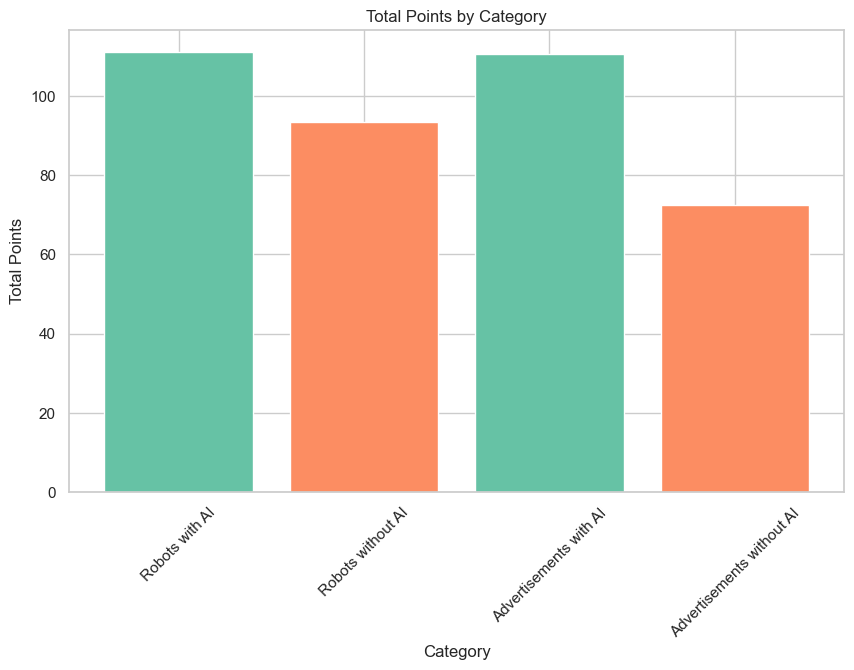

In [394]:
# Set the color palette to 'Set2'
sns.set_palette("Set2")
colors = sns.color_palette("Set2")[0:2]  # Select the first two colors from the Set2 palette

# Calculate average points for each category
robots_with_ai_avg_points = data[(data['With AI'] == 'Yes') & (data['Exam Set'] == 'Robots')]['Total Points'].mean()
robots_without_ai_avg_points = data[(data['With AI'] == 'No') & (data['Exam Set'] == 'Robots')]['Total Points'].mean()
ads_with_ai_avg_points = data[(data['With AI'] == 'Yes') & (data['Exam Set'] == 'Advertisements')]['Total Points'].mean()
ads_without_ai_avg_points = data[(data['With AI'] == 'No') & (data['Exam Set'] == 'Advertisements')]['Total Points'].mean()

totals = [
    robots_with_ai_avg_points,
    robots_without_ai_avg_points,
    ads_with_ai_avg_points,
    ads_without_ai_avg_points
]

# Create a list of category names
categories = [
    'Robots with AI',
    'Robots without AI',
    'Advertisements with AI',
    'Advertisements without AI'
]

# Assign colors specifically to 'With AI' and 'Without AI'
category_colors = [colors[0] if 'with AI' in cat else colors[1] for cat in categories]  # 'With AI' gets one color, 'Without AI' gets another

# Plotting the total points by category
plt.figure(figsize=(10, 6))
plt.bar(categories, totals, color=category_colors)
plt.xlabel('Category')
plt.ylabel('Total Points')
plt.title('Total Points by Category')
plt.xticks(rotation=45)
plt.show()

## Grade Metric

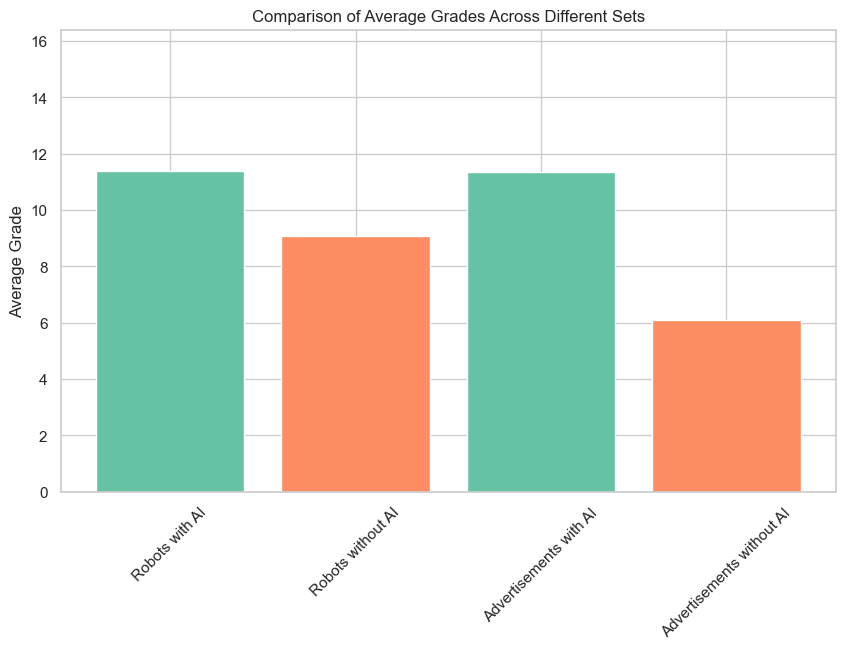

In [395]:
# Set the color palette to 'Set2'
sns.set_palette("Set2")
colors = sns.color_palette("Set2")[0:2]  # Select the first two colors from the Set2 palette

# Calculating average grades
avg_grade_with_ai_robots = data_with_ai_robots['Grade'].mean()
avg_grade_without_ai_robots = data_without_ai_robots['Grade'].mean()
avg_grade_with_ai_ads = data_with_ai_ads['Grade'].mean()
avg_grade_without_ai_ads = data_without_ai_ads['Grade'].mean()

# Preparing data for plotting
categories = ['Robots with AI', 'Robots without AI', 'Advertisements with AI', 'Advertisements without AI']
average_grades = [avg_grade_with_ai_robots, avg_grade_without_ai_robots, avg_grade_with_ai_ads, avg_grade_without_ai_ads]

# Assign colors specifically to 'With AI' and 'Without AI'
category_colors = [colors[0] if 'with AI' in cat else colors[1] for cat in categories]  # 'With AI' gets one color, 'Without AI' gets another

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(categories, average_grades, color=category_colors)
ax.set_ylabel('Average Grade')
ax.set_title('Comparison of Average Grades Across Different Sets')
ax.set_ylim(0, max(average_grades) + 5)  # Adjust y-limit for better visualization

plt.xticks(rotation=45)  # Rotate category labels for better readability
plt.show()


## Plots for discussion

### Background information

### Filtering for backgroundinformation

In [396]:
# Filter the data to include only every second row starting from the first one
filtered_data = data.iloc[::2]

# Convert specified columns to numeric, errors='coerce' will set non-convertible values to NaN
column_names = [
    'How many years of developer experience do you have?',
    'How many years of experience do you have with Java?',
    'How many months is it since you coded in Java?',
    'How many years of experience do you have with Visual Studio Code?',
    'How much experience in years do you have in using an LLM(ChatGPT, CoPilot, Gemini)?'
]

for column in column_names:
    filtered_data[column] = pd.to_numeric(filtered_data[column], errors='coerce')

# Rename dictionary for columns
rename_dict = {
    'How many years of developer experience do you have?': 'Dev Exp (Years)',
    'How many years of experience do you have with Java?': 'Java Exp (Years)',
    'How many months is it since you coded in Java?': 'Java Coding Gap (Years)',
    'How many years of experience do you have with Visual Studio Code?': 'VS Code Exp (Years)',
    'How much experience in years do you have in using an LLM(ChatGPT, CoPilot, Gemini)?': 'LLM Exp (Years)'
}

# Rename the columns in the DataFrame
filtered_data.rename(columns=rename_dict, inplace=True)

# Now perform numeric conversion for the renamed columns
for column in rename_dict.values():  # Using new column names
    filtered_data[column] = pd.to_numeric(filtered_data[column], errors='coerce')

C:\Users\sverr\AppData\Local\Temp\ipykernel_19268\1554073757.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[column] = pd.to_numeric(filtered_data[column], errors='coerce')
C:\Users\sverr\AppData\Local\Temp\ipykernel_19268\1554073757.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.rename(columns=rename_dict, inplace=True)
C:\Users\sverr\AppData\Local\Temp\ipykernel_19268\1554073757.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

### Difference between Operating system and 'Total Time Minutes

In [397]:
# Calculate the total time spent on tasks for each operating system
total_points_windows = filtered_data[filtered_data['Which operating system do you usually use'] == 'Windows']['Total Points'].sum()
total_time_windows = filtered_data[filtered_data['Which operating system do you usually use'] == 'Windows']['Total_Time_Minutes'].sum()
total_points_macos = filtered_data[filtered_data['Which operating system do you usually use'] == 'MacOS']['Total Points'].sum()
total_time_macos = filtered_data[filtered_data['Which operating system do you usually use'] == 'MacOS']['Total_Time_Minutes'].sum()

# Print out the total time in minutes per operating system
print("Total time spent on tasks for Windows users:", total_time_windows)
print("Total time spent on tasks for MacOS users:", total_time_macos)
print("Total points on tasks for Windows users:", total_points_windows)
print("Total points on tasks for MacOS users:", total_points_macos) 

Total time spent on tasks for Windows users: 123.0
Total time spent on tasks for MacOS users: 297.0
Total points on tasks for Windows users: 594
Total points on tasks for MacOS users: 1294


### Correlation metrics 

#### Java Experience and Total Points

In [398]:
# Check if the necessary columns exist or create them
if 'How many months is it since you coded in Java?' in data.columns:
    data['Java Coding Gap (Years)'] = pd.to_numeric(data['How many months is it since you coded in Java?'], errors='coerce') / 12
else:
    print("Column 'How many months is it since you coded in Java?' does not exist.")

# Ensure 'Total Points' is numeric
data['Total Points'] = pd.to_numeric(data['Total Points'], errors='coerce')

# Check and compute Spearman correlation if the new column exists
if 'Java Coding Gap (Years)' in data.columns:
    spearman_correlation_java_gap = data['Java Coding Gap (Years)'].corr(data['Total Points'], method='spearman')
    print("Spearman Correlation between Java Coding Gap and Total Points:", spearman_correlation_java_gap)
else:
    print("Column 'Java Coding Gap (Years)' does not exist, please check your data processing steps.")

# Calculate the Spearman correlation for 'Java Exp (Years)' if that column exists
if 'How many years of experience do you have with Java?' in data.columns:
    data['How many years of experience do you have with Java?'] = pd.to_numeric(data['How many years of experience do you have with Java?'], errors='coerce')
    spearman_correlation_java_exp = data['How many years of experience do you have with Java?'].corr(data['Total Points'], method='spearman')
    print("Spearman Correlation between Java Experience and Total Points:", spearman_correlation_java_exp)
else:
    print("Column 'How many years of experience do you have with Java?' does not exist.")



Spearman Correlation between Java Coding Gap and Total Points: -0.18873065760790503
Spearman Correlation between Java Experience and Total Points: -0.4044782746324914


In [399]:
# Convert 'Java Coding Gap' from months to years
data['Java Coding Gap (Years)'] = data['How many months is it since you coded in Java?'].astype(float) / 12

# Ensure the columns are numeric
data['How many years of experience do you have with Java?'] = pd.to_numeric(data['How many years of experience do you have with Java?'], errors='coerce')
data['Total Points'] = pd.to_numeric(data['Total Points'], errors='coerce')

# Optional: Drop rows where any of the required columns is NaN
data.dropna(subset=['How many years of experience do you have with Java?', 'Total Points', 'Java Coding Gap (Years)'], inplace=True)

# Calculate the correlation for 'Java Exp (Years)'
correlation_java_exp = data['How many years of experience do you have with Java?'].corr(data['Total Points'])
print("Correlation between Java Experience and Total Points:", correlation_java_exp)

# Calculate the correlation for 'Java Coding Gap (Years)'
correlation_java_gap = data['Java Coding Gap (Years)'].corr(data['Total Points'])
print("Correlation between Java Coding Gap and Total Points:", correlation_java_gap)


Correlation between Java Experience and Total Points: -0.3538967693445424
Correlation between Java Coding Gap and Total Points: -0.33405567789819535


In [400]:

groups = {
    'Robots with AI': robots_with_ai,
    'Robots without AI': robots_without_ai,
    'Advertisements with AI': ads_with_ai,
    'Advertisements without AI': ads_without_ai
}

for name, group in groups.items():
    mean_time = np.mean(group['Total_Time_Minutes'])
    std_dev_time = np.std(group['Total_Time_Minutes'], ddof=1)
    confidence_interval = stats.norm.interval(0.95, loc=mean_time, scale=std_dev_time / np.sqrt(len(group['Total_Time_Minutes'])))

    print(f"{name} - Mean Time: {mean_time:.2f} minutes")
    print(f"{name} - Standard Deviation: {std_dev_time:.2f} minutes")
    print(f"{name} - 95% Confidence Interval: {confidence_interval}\n")

Robots with AI - Mean Time: 16.80 minutes
Robots with AI - Standard Deviation: 5.20 minutes
Robots with AI - 95% Confidence Interval: (13.575477005610686, 20.024522994389315)

Robots without AI - Mean Time: 25.17 minutes
Robots without AI - Standard Deviation: 6.71 minutes
Robots without AI - 95% Confidence Interval: (21.36865772976589, 28.964675603567446)

Advertisements with AI - Mean Time: 18.08 minutes
Advertisements with AI - Standard Deviation: 8.27 minutes
Advertisements with AI - 95% Confidence Interval: (13.402377096514051, 22.764289570152613)

Advertisements without AI - Mean Time: 26.30 minutes
Advertisements without AI - Standard Deviation: 5.25 minutes
Advertisements without AI - 95% Confidence Interval: (23.045830139285883, 29.55416986071412)



In [401]:
# Assuming you have these dataframes already filtered from your dataset
groups = {
    'Robots with AI': robots_with_ai,
    'Robots without AI': robots_without_ai,
    'Advertisements with AI': ads_with_ai,
    'Advertisements without AI': ads_without_ai
}

for name, group in groups.items():
    # Assuming 'Total Points' is the column with the total points for each participant
    mean_points = np.mean(group['Total Points'])
    std_dev_points = np.std(group['Total Points'], ddof=1)
    confidence_interval = stats.norm.interval(0.95, loc=mean_points, scale=std_dev_points / np.sqrt(len(group['Total Points'])))

    print(f"{name} - Mean Points: {mean_points:.2f}")
    print(f"{name} - Standard Deviation: {std_dev_points:.2f}")
    print(f"{name} - 95% Confidence Interval: {confidence_interval}\n")


Robots with AI - Mean Points: 111.10
Robots with AI - Standard Deviation: 7.99
Robots with AI - 95% Confidence Interval: (106.14637654952676, 116.05362345047322)

Robots without AI - Mean Points: 93.50
Robots without AI - Standard Deviation: 20.47
Robots without AI - 95% Confidence Interval: (81.91599632780493, 105.08400367219507)

Advertisements with AI - Mean Points: 110.58
Advertisements with AI - Standard Deviation: 8.63
Advertisements with AI - 95% Confidence Interval: (105.70152212217774, 115.46514454448892)

Advertisements without AI - Mean Points: 72.60
Advertisements without AI - Standard Deviation: 31.40
Advertisements without AI - 95% Confidence Interval: (53.13760259190161, 92.06239740809838)



AI Group - Mean: 92.125, Median: 94.0, Variance: 90.98214285714286, Standard Deviation: 9.538455999643908, 95% CI: (85.51530867585119, 98.73469132414881)
No AI Group - Mean: 47.4, Median: 50.0, Variance: 777.3, Standard Deviation: 27.88010043023518, 95% CI: (22.962463539360016, 71.83753646063998)
T-statistic: 4.251251295360487, P-value: 0.001362872685428542


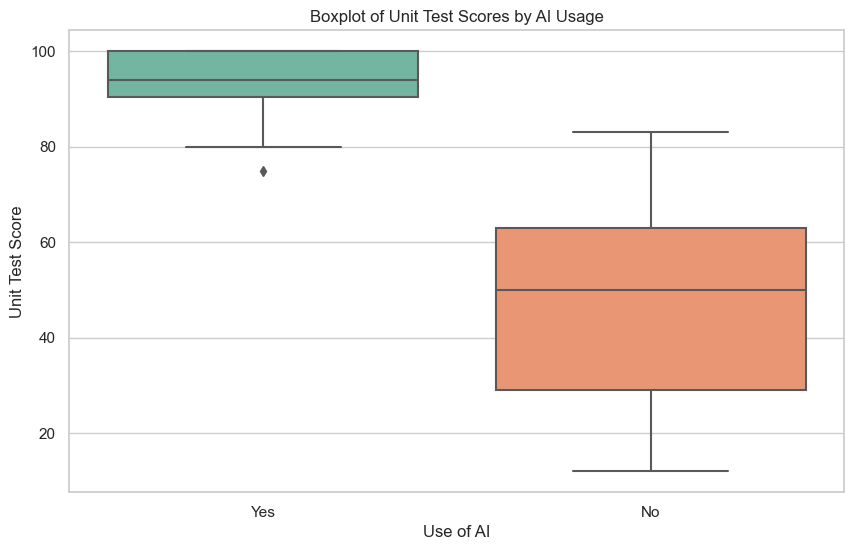

In [402]:
# Filter data for AI and No AI
data_ai = data[data['With AI'] == 'Yes']['Unit Test'].dropna()
data_no_ai = data[data['With AI'] == 'No']['Unit Test'].dropna()

# Calculate t-test between groups
t_stat, p_value = stats.ttest_ind(data_ai, data_no_ai)

# Calculate statistical metrics for AI
mean_ai = np.mean(data_ai)
median_ai = np.median(data_ai)
variance_ai = np.var(data_ai, ddof=1)
std_dev_ai = np.std(data_ai, ddof=1)
confidence_interval_ai = stats.norm.interval(0.95, loc=mean_ai, scale=std_dev_ai/np.sqrt(len(data_ai)))

# Calculate statistical metrics for No AI
mean_no_ai = np.mean(data_no_ai)
median_no_ai = np.median(data_no_ai)
variance_no_ai = np.var(data_no_ai, ddof=1)
std_dev_no_ai = np.std(data_no_ai, ddof=1)
confidence_interval_no_ai = stats.norm.interval(0.95, loc=mean_no_ai, scale=std_dev_no_ai/np.sqrt(len(data_no_ai)))

# Print the results
print(f"AI Group - Mean: {mean_ai}, Median: {median_ai}, Variance: {variance_ai}, Standard Deviation: {std_dev_ai}, 95% CI: {confidence_interval_ai}")
print(f"No AI Group - Mean: {mean_no_ai}, Median: {median_no_ai}, Variance: {variance_no_ai}, Standard Deviation: {std_dev_no_ai}, 95% CI: {confidence_interval_no_ai}")
print(f"T-statistic: {t_stat}, P-value: {p_value}")

# Set the color palette to 'Set2'
sns.set_palette("Set2")
colors = sns.color_palette("Set2")[0:2]  # Select the first two colors from the Set2 palette

# Plot the results
plt.figure(figsize=(10, 6))
sns.boxplot(x='With AI', y='Unit Test', data=data, palette={'Yes': colors[0], 'No': colors[1]})
plt.title('Boxplot of Unit Test Scores by AI Usage')
plt.xlabel('Use of AI')
plt.ylabel('Unit Test Score')
plt.show()


In [403]:

print("Columns in the dataset:", data.columns)

# Define a function to calculate total time spent
def calculate_total_time(row):
    total_time = 0
    for task in row:
        if isinstance(task, str):
            parts = task.split(' ')  # Split based on space to separate time and binary indicator
            if len(parts) == 2:
                time_str = parts[0]  # Time is always the first part
            else:
                time_str = task  # Handle case where there's only a time value
            total_time += int(time_str)
    return total_time

# Apply function to calculate total time
data['Total_Time_Minutes'] = data.iloc[:, 3:11].apply(calculate_total_time, axis=1) / 60

print("Check if 'Total_Time_Minutes' is in data:", 'Total_Time_Minutes' in data.columns)

# Statistical Calculations and Plotting here


Columns in the dataset: Index(['Exam Set', 'With AI', 'Participant', 'Task 1', 'Task 2', 'Task 3',
       'Task 4', 'Task 5', 'Task 6', 'Task 7', 'Task 8', 'Task 9',
       'What is your age?', 'In what subject was your bachelor?',
       'How many years of developer experience do you have?',
       'How many years of experience do you have with Java?',
       'How many months is it since you coded in Java?',
       'How many years of experience do you have with Visual Studio Code?',
       'How much experience in years do you have in using an LLM(ChatGPT, CoPilot, Gemini)?',
       'Which operating system do you usually use', 'Task 1 points',
       'Task 2 points', 'Task 3 points', 'Task 4 points', 'Task 5 points',
       'Task 6 points', 'Task 7 points', 'Task 8 points', 'Task 9 points',
       'Total Points', 'Unit Test', 'Grade', 'Lazy Programmer', 'Total_Time',
       'Total_Time_Minutes', 'Total_Prompt_Count', 'Java Coding Gap (Years)'],
      dtype='object')
Check if 'Total_Tim

Columns in dataset after adding Total_Time_Minutes: Index(['Exam Set', 'With AI', 'Participant', 'Task 1', 'Task 2', 'Task 3',
       'Task 4', 'Task 5', 'Task 6', 'Task 7', 'Task 8', 'Task 9',
       'What is your age?', 'In what subject was your bachelor?',
       'How many years of developer experience do you have?',
       'How many years of experience do you have with Java?',
       'How many months is it since you coded in Java?',
       'How many years of experience do you have with Visual Studio Code?',
       'How much experience in years do you have in using an LLM(ChatGPT, CoPilot, Gemini)?',
       'Which operating system do you usually use', 'Task 1 points',
       'Task 2 points', 'Task 3 points', 'Task 4 points', 'Task 5 points',
       'Task 6 points', 'Task 7 points', 'Task 8 points', 'Task 9 points',
       'Total Points', 'Unit Test', 'Grade', 'Lazy Programmer', 'Total_Time',
       'Total_Time_Minutes', 'Total_Prompt_Count', 'Java Coding Gap (Years)'],
      dtype='

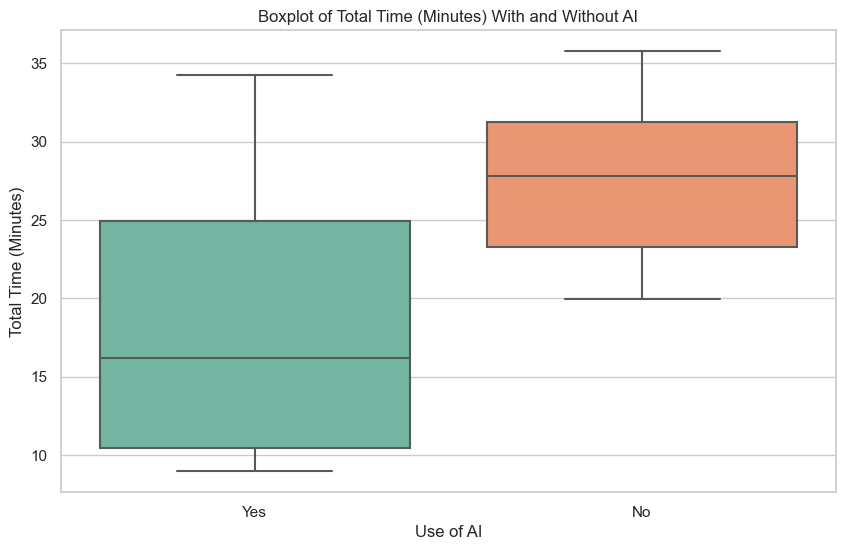

              mean     median        var       std  \
With AI                                              
No       27.613333  27.783333  39.268250  6.266438   
Yes      18.500000  16.166667  89.997143  9.486682   

                                           95% CI  
With AI                                            
No         (22.12065884205457, 33.10600782461209)  
Yes      (11.926185294425306, 25.073814705574694)  
T-test for Time: TtestResult(statistic=-2.0850819980561006, pvalue=0.06140106960243733, df=10.893877839905658)


In [404]:
# Define a function to calculate total time spent
def calculate_total_time(row):
    total_time = 0
    for task in row:
        if isinstance(task, str):
            parts = task.split(' ')  # Split based on space to separate time and binary indicator
            if len(parts) == 2:
                time_str = parts[0]  # Time is always the first part
            else:
                time_str = task  # Handle case where there's only a time value
            total_time += int(time_str)
    return total_time

# Apply function to calculate total time
data['Total_Time_Minutes'] = data.iloc[:, 3:11].apply(calculate_total_time, axis=1) / 60
print("Columns in dataset after adding Total_Time_Minutes:", data.columns)

# Group data by 'With AI' and perform statistical analysis
if 'Total_Time_Minutes' in data.columns:
    grouped_time = data.groupby('With AI')['Total_Time_Minutes']
    time_stats = grouped_time.agg(['mean', 'median', 'var', 'std'])
    time_stats['95% CI'] = grouped_time.apply(lambda x: stats.norm.interval(0.95, loc=np.mean(x), scale=np.std(x, ddof=1)/np.sqrt(len(x))))
    t_test_time = ttest_ind(grouped_time.get_group('Yes'), grouped_time.get_group('No'), equal_var=False)
    
    # Plotting the results
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='With AI', y='Total_Time_Minutes', data=data, palette=sns.color_palette("Set2")[0:2])
    plt.title('Boxplot of Total Time (Minutes) With and Without AI')
    plt.xlabel('Use of AI')
    plt.ylabel('Total Time (Minutes)')
    plt.show()
    
    print(time_stats)
    print('T-test for Time:', t_test_time)
else:
    print("Column 'Total_Time_Minutes' does not exist. Please check your data preprocessing steps.")


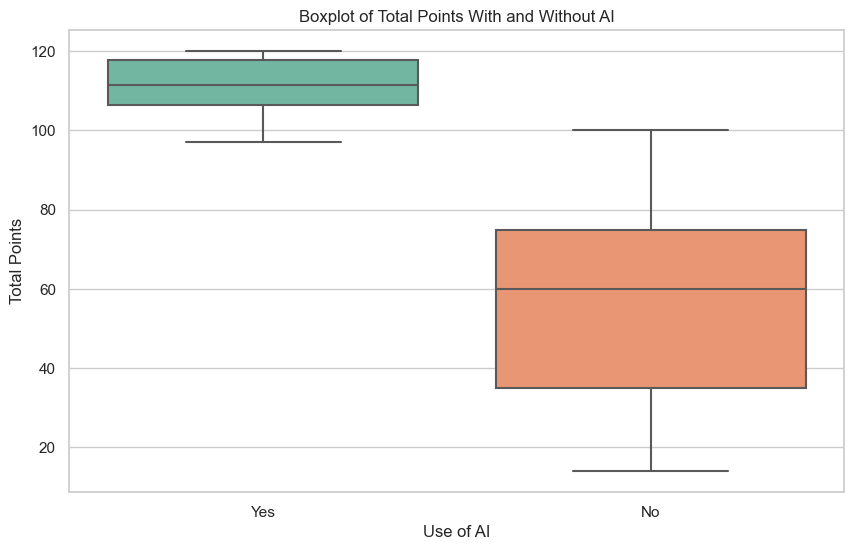

            mean  median          var        std  \
With AI                                            
No        56.800    60.0  1128.700000  33.596131   
Yes      110.625   111.5    77.982143   8.830750   

                                           95% CI  
With AI                                            
No        (27.352234139352916, 86.24776586064708)  
Yes      (104.50571500770718, 116.74428499229282)  
T-test for Points: TtestResult(statistic=3.507517624465463, pvalue=0.021570111573126178, df=4.348276574231282)


In [405]:
# Verify that 'Total Points' is correctly calculated and exists
if 'Total Points' not in data.columns:
    print("Total Points column missing. Check data processing steps.")
else:
    # Group data by 'With AI'
    grouped_points = data.groupby('With AI')['Total Points']

    # Compute statistics for points
    points_stats = grouped_points.agg(['mean', 'median', 'var', 'std'])
    points_stats['95% CI'] = grouped_points.apply(
        lambda x: stats.norm.interval(0.95, loc=np.mean(x), scale=np.std(x, ddof=1)/np.sqrt(len(x)))
    )

    # T-tests for points
    t_test_points = ttest_ind(
        grouped_points.get_group('Yes'), 
        grouped_points.get_group('No'), 
        equal_var=False
    )

    # Set the color palette
    sns.set_palette(sns.color_palette("Set2")[0:2])

    # Plotting the boxplot for points
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='With AI', y='Total Points', data=data, palette=sns.color_palette("Set2")[0:2])
    plt.title('Boxplot of Total Points With and Without AI')
    plt.xlabel('Use of AI')
    plt.ylabel('Total Points')
    plt.show()

    print(points_stats)
    print('T-test for Points:', t_test_points)


Descriptive statistics

In [406]:

# Define a function to calculate total time spent
def calculate_total_time(row):
    total_time = 0
    for task in row:
        if isinstance(task, str):
            parts = task.split(' ')  # Split based on space to separate time and binary indicator
            if len(parts) == 2:
                time_str = parts[0]  # Time is always the first part
            else:
                time_str = task  # Handle case where there's only a time value
            total_time += int(time_str)
    return total_time

# Apply function to calculate total time
data['Total_Time_Minutes'] = data.iloc[:, 3:11].apply(calculate_total_time, axis=1) / 60

# Ensure that 'With AI' and 'Total_Time_Minutes' are in the DataFrame
if 'With AI' in data.columns and 'Total_Time_Minutes' in data.columns:
    # Group data by 'With AI' and calculate descriptive statistics
    time_stats = data.groupby('With AI')['Total_Time_Minutes'].agg([
        'mean', 'median', 'min', 'max', 'var', 'std', 'skew'
    ])
    time_stats['range'] = data.groupby('With AI')['Total_Time_Minutes'].max() - data.groupby('With AI')['Total_Time_Minutes'].min()
    time_stats['IQR'] = data.groupby('With AI')['Total_Time_Minutes'].quantile(0.75) - data.groupby('With AI')['Total_Time_Minutes'].quantile(0.25)

    print(time_stats)
else:
    print("Necessary columns not found. Please check data loading and processing steps.")


              mean     median        min        max        var       std  \
With AI                                                                    
No       27.613333  27.783333  19.966667  35.766667  39.268250  6.266438   
Yes      18.500000  16.166667   8.966667  34.233333  89.997143  9.486682   

             skew      range        IQR  
With AI                                  
No       0.105793  15.800000   7.983333  
Yes      0.592324  25.266667  14.491667  


In [407]:
# Descriptive statistics for Total Points
points_stats = data.groupby('With AI')['Total Points'].agg([
    'mean', 'median', 'min', 'max', 'var', 'std', 'skew'
])
points_stats['range'] = data.groupby('With AI')['Total Points'].max() - data.groupby('With AI')['Total Points'].min()
points_stats['IQR'] = data.groupby('With AI')['Total Points'].quantile(0.75) - data.groupby('With AI')['Total Points'].quantile(0.25)

print(points_stats)

            mean  median  min  max          var        std      skew  range  \
With AI                                                                       
No        56.800    60.0   14  100  1128.700000  33.596131 -0.022856     86   
Yes      110.625   111.5   97  120    77.982143   8.830750 -0.604218     23   

           IQR  
With AI         
No       40.00  
Yes      11.25  


In [408]:
# Descriptive statistics for Unit Test
unit_test_stats = data.groupby('With AI')['Unit Test'].agg([
    'mean', 'median', 'min', 'max', 'var', 'std', 'skew'
])
unit_test_stats['range'] = data.groupby('With AI')['Unit Test'].max() - data.groupby('With AI')['Unit Test'].min()
unit_test_stats['IQR'] = data.groupby('With AI')['Unit Test'].quantile(0.75) - data.groupby('With AI')['Unit Test'].quantile(0.25)

print(unit_test_stats)

           mean  median  min  max         var        std      skew  range  \
With AI                                                                     
No       47.400    50.0   12   83  777.300000  27.880100 -0.031904     71   
Yes      92.125    94.0   75  100   90.982143   9.538456 -1.167630     25   

          IQR  
With AI        
No       34.0  
Yes       9.5  


Statistical significance

In [409]:
# T-test for Total Time Minutes
time_ai = data[data['With AI'] == 'Yes']['Total_Time_Minutes']
time_no_ai = data[data['With AI'] == 'No']['Total_Time_Minutes']
t_stat_time, p_value_time = stats.ttest_ind(time_ai, time_no_ai, equal_var=False)

# Calculating Confidence Intervals for both groups
mean_time_ai = np.mean(time_ai)
std_time_ai = np.std(time_ai, ddof=1)
ci_low_time_ai, ci_high_time_ai = stats.norm.interval(0.95, loc=mean_time_ai, scale=std_time_ai / np.sqrt(len(time_ai)))

mean_time_no_ai = np.mean(time_no_ai)
std_time_no_ai = np.std(time_no_ai, ddof=1)
ci_low_time_no_ai, ci_high_time_no_ai = stats.norm.interval(0.95, loc=mean_time_no_ai, scale=std_time_no_ai / np.sqrt(len(time_no_ai)))

print("T-statistic for Time:", t_stat_time)
print("P-value for Time:", p_value_time)
print("95% Confidence Interval for Time (AI):", ci_low_time_ai, ci_high_time_ai)
print("95% Confidence Interval for Time (No AI):", ci_low_time_no_ai, ci_high_time_no_ai)

T-statistic for Time: -2.0850819980561006
P-value for Time: 0.06140106960243733
95% Confidence Interval for Time (AI): 11.926185294425306 25.073814705574694
95% Confidence Interval for Time (No AI): 22.12065884205457 33.10600782461209


In [410]:
# T-test for Total Points
points_ai = data[data['With AI'] == 'Yes']['Total Points']
points_no_ai = data[data['With AI'] == 'No']['Total Points']
t_stat_points, p_value_points = stats.ttest_ind(points_ai, points_no_ai, equal_var=False)

# Calculating Confidence Intervals for both groups
mean_points_ai = np.mean(points_ai)
std_points_ai = np.std(points_ai, ddof=1)
ci_low_points_ai, ci_high_points_ai = stats.norm.interval(0.95, loc=mean_points_ai, scale=std_points_ai / np.sqrt(len(points_ai)))

mean_points_no_ai = np.mean(points_no_ai)
std_points_no_ai = np.std(points_no_ai, ddof=1)
ci_low_points_no_ai, ci_high_points_no_ai = stats.norm.interval(0.95, loc=mean_points_no_ai, scale=std_points_no_ai / np.sqrt(len(points_no_ai)))

print("T-statistic for Points:", t_stat_points)
print("P-value for Points:", p_value_points)
print("95% Confidence Interval for Points (AI):", ci_low_points_ai, ci_high_points_ai)
print("95% Confidence Interval for Points (No AI):", ci_low_points_no_ai, ci_high_points_no_ai)

T-statistic for Points: 3.507517624465463
P-value for Points: 0.021570111573126178
95% Confidence Interval for Points (AI): 104.50571500770718 116.74428499229282
95% Confidence Interval for Points (No AI): 27.352234139352916 86.24776586064708


In [411]:
# T-test for Unit Test Scores
test_scores_ai = data[data['With AI'] == 'Yes']['Unit Test']
test_scores_no_ai = data[data['With AI'] == 'No']['Unit Test']
t_stat_test, p_value_test = stats.ttest_ind(test_scores_ai, test_scores_no_ai, equal_var=False)

# Calculating Confidence Intervals for both groups
mean_test_ai = np.mean(test_scores_ai)
std_test_ai = np.std(test_scores_ai, ddof=1)
ci_low_test_ai, ci_high_test_ai = stats.norm.interval(0.95, loc=mean_test_ai, scale=std_test_ai / np.sqrt(len(test_scores_ai)))

mean_test_no_ai = np.mean(test_scores_no_ai)
std_test_no_ai = np.std(test_scores_no_ai, ddof=1)
ci_low_test_no_ai, ci_high_test_no_ai = stats.norm.interval(0.95, loc=mean_test_no_ai, scale=std_test_no_ai / np.sqrt(len(test_scores_no_ai)))

print("T-statistic for Unit Test:", t_stat_test)
print("P-value for Unit Test:", p_value_test)
print("95% Confidence Interval for Unit Test (AI):", ci_low_test_ai, ci_high_test_ai)
print("95% Confidence Interval for Unit Test (No AI):", ci_low_test_no_ai, ci_high_test_no_ai)

T-statistic for Unit Test: 3.4626585777327534
P-value for Unit Test: 0.020630034064080652
95% Confidence Interval for Unit Test (AI): 85.51530867585119 98.73469132414881
95% Confidence Interval for Unit Test (No AI): 22.962463539360016 71.83753646063998


Plots to see distribution

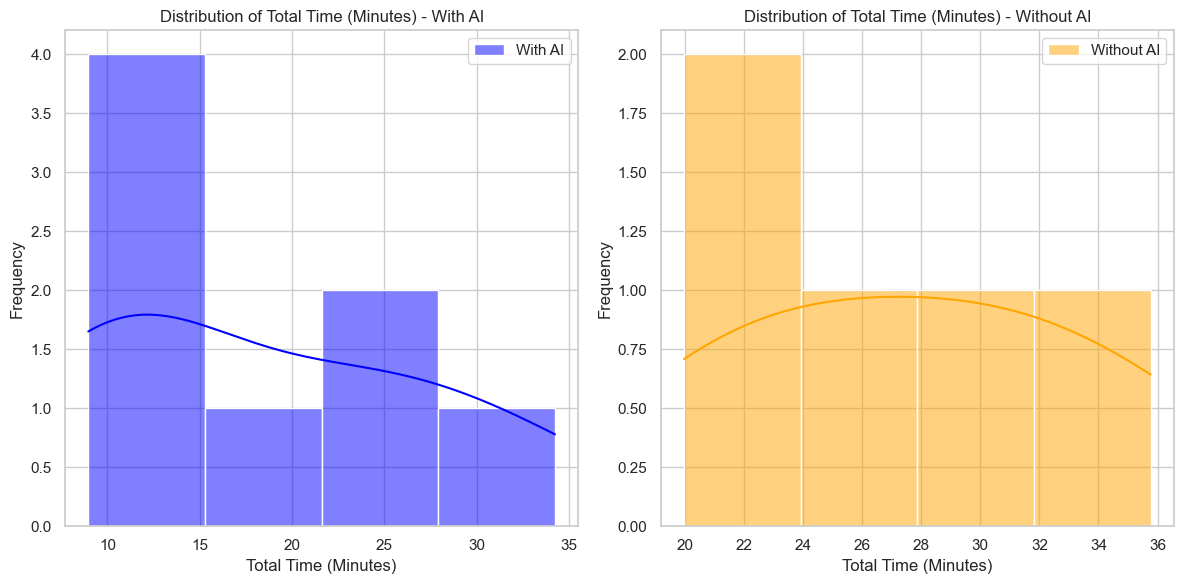

In [412]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data[data['With AI'] == 'Yes']['Total_Time_Minutes'], color='blue', kde=True, label='With AI')
plt.title('Distribution of Total Time (Minutes) - With AI')
plt.xlabel('Total Time (Minutes)')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 2, 2)
sns.histplot(data[data['With AI'] == 'No']['Total_Time_Minutes'], color='orange', kde=True, label='Without AI')
plt.title('Distribution of Total Time (Minutes) - Without AI')
plt.xlabel('Total Time (Minutes)')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

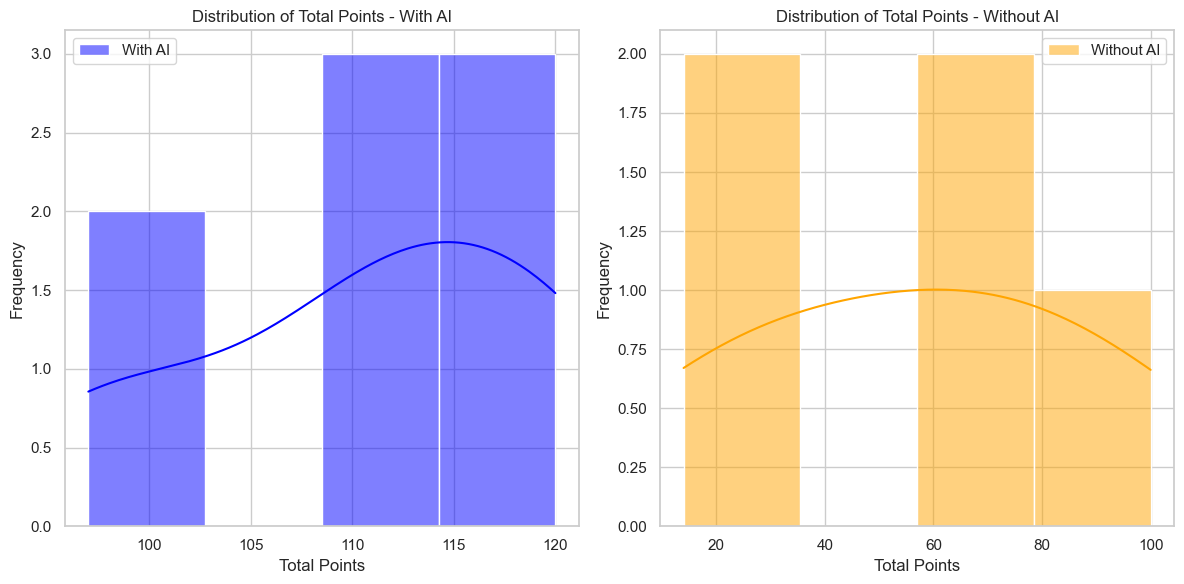

In [413]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data[data['With AI'] == 'Yes']['Total Points'], color='blue', kde=True, label='With AI')
plt.title('Distribution of Total Points - With AI')
plt.xlabel('Total Points')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 2, 2)
sns.histplot(data[data['With AI'] == 'No']['Total Points'], color='orange', kde=True, label='Without AI')
plt.title('Distribution of Total Points - Without AI')
plt.xlabel('Total Points')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

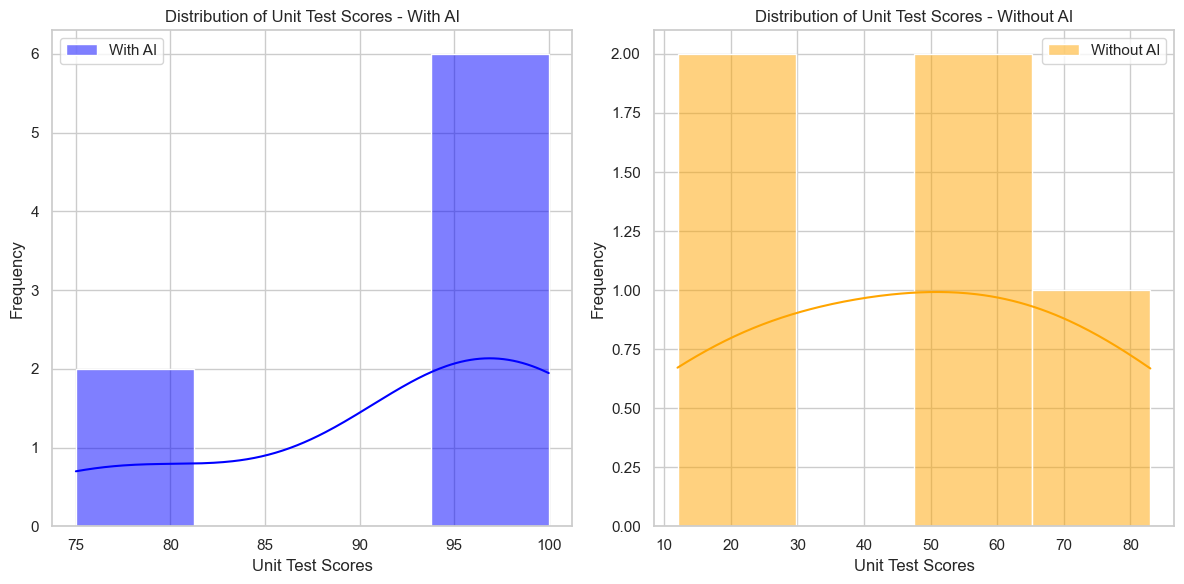

In [414]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data[data['With AI'] == 'Yes']['Unit Test'], color='blue', kde=True, label='With AI')
plt.title('Distribution of Unit Test Scores - With AI')
plt.xlabel('Unit Test Scores')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 2, 2)
sns.histplot(data[data['With AI'] == 'No']['Unit Test'], color='orange', kde=True, label='Without AI')
plt.title('Distribution of Unit Test Scores - Without AI')
plt.xlabel('Unit Test Scores')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

Not normally distributed, so we opt for Mann-Whitney U Test instead of T-test

In [415]:
import scipy.stats as stats

# Assuming 'data' is your DataFrame and 'Total_Time_Minutes', 'Total Points', 'Unit Test' are your columns
# Group data by 'With AI'
time_with_ai = data[data['With AI'] == 'Yes']['Total_Time_Minutes']
time_without_ai = data[data['With AI'] == 'No']['Total_Time_Minutes']
points_with_ai = data[data['With AI'] == 'Yes']['Total Points']
points_without_ai = data[data['With AI'] == 'No']['Total Points']
scores_with_ai = data[data['With AI'] == 'Yes']['Unit Test']
scores_without_ai = data[data['With AI'] == 'No']['Unit Test']

# Mann-Whitney U Test for Time
u_stat_time, p_val_time = stats.mannwhitneyu(time_with_ai, time_without_ai, alternative='two-sided')
print("Mann-Whitney U test for Time:", u_stat_time, "P-value:", p_val_time)

Mann-Whitney U test for Time: 9.0 P-value: 0.12742812742812742


In [416]:
# Mann-Whitney U Test for Points
u_stat_points, p_val_points = stats.mannwhitneyu(points_with_ai, points_without_ai, alternative='two-sided')
print("Mann-Whitney U test for Points:", u_stat_points, "P-value:", p_val_points)

Mann-Whitney U test for Points: 38.0 P-value: 0.010309737991308444


In [417]:
# Mann-Whitney U Test for Unit Test Scores
u_stat_scores, p_val_scores = stats.mannwhitneyu(scores_with_ai, scores_without_ai, alternative='two-sided')
print("Mann-Whitney U test for Unit Test Scores:", u_stat_scores, "P-value:", p_val_scores)

Mann-Whitney U test for Unit Test Scores: 38.0 P-value: 0.009587523497984782


In [420]:
import pandas as pd

# Load your data
file_path = 'data.csv'  # Update this with the correct path to your data file
data = pd.read_csv(file_path)

# Print the column names to check if 'With AI' is listed correctly
print("Columns in the dataset:", data.columns)

# If 'With AI' is not found, you may need to check the file or adjust the column name used
if 'With AI' not in data.columns:
    print("Column 'With AI' not found. Please check the data file and column names.")
else:
    # Proceed with your data manipulation and visualization
    data['With AI'] = data['With AI'].astype(str)  # Convert to string if it's categorical
    print("Column 'With AI' found and converted to string type.")


Columns in the dataset: Index(['Exam Set;With AI;Participant;Task 1;Task 2;Task 3;Task 4;Task 5;Task 6;Task 7;Task 8;Task 9;What is your age?;In what subject was your bachelor?;How many years of developer experience do you have?;How many years of experience do you have with Java?;How many months is it since you coded in Java?;How many years of experience do you have with Visual Studio Code?;How much experience in years do you have in using an LLM(ChatGPT',
       ' CoPilot',
       ' Gemini)?;Which operating system do you usually use;Task 1 points;Task 2 points;Task 3 points;Task 4 points;Task 5 points;Task 6 points;Task 7 points;Task 8 points;Task 9 points;Total Points;Unit Test;Grade;Lazy Programmer'],
      dtype='object')
Column 'With AI' not found. Please check the data file and column names.


IndexError: list index out of range

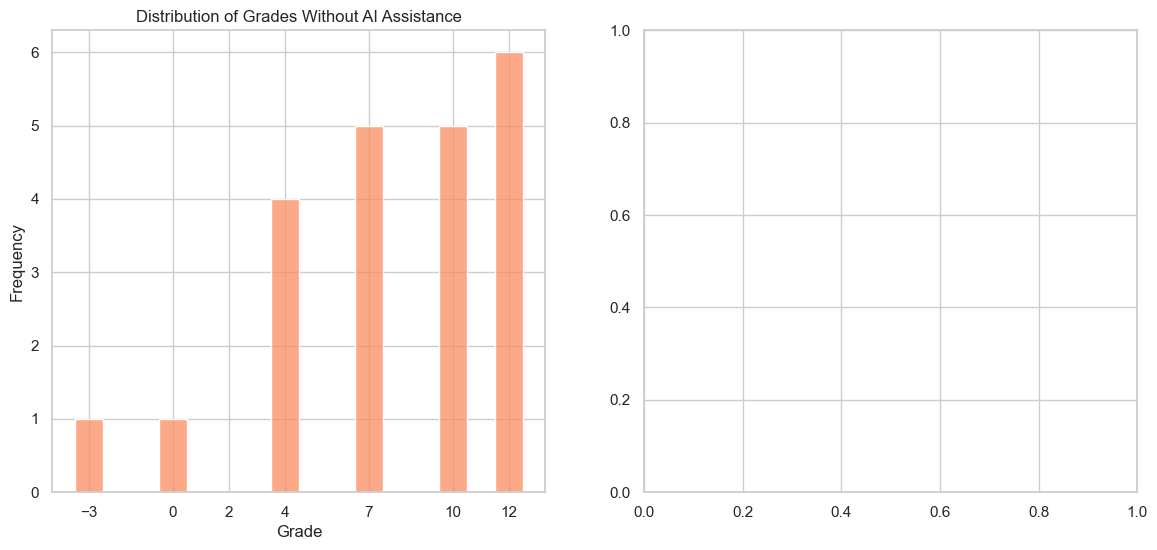

In [427]:
# Set visual styling to 'whitegrid' and set the palette to 'Set2'
sns.set(style='whitegrid', palette='Set2')
colors = sns.color_palette('Set2')[0:2]  # Get the colors from the 'Set2' palette

# Filter data by AI assistance
data_no_ai = data[data['With AI'] == 'No']
data_yes_ai = data[data['With AI'] == 'Yes']

# Defining exact bin edges to separate each grade category distinctly
bin_edges = [-3.5, -2.5, -0.5, 0.5, 1.5, 2.5, 3.5, 4.5, 6.5, 7.5, 9.5, 10.5, 11.5, 12.5]

# Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plotting distribution of Grades for "No AI" group
sns.histplot(data_no_ai['Grade'], kde=False, ax=axes[0], color=colors[1], bins=bin_edges)  # Use a specific color from 'Set2'
axes[0].set_title('Distribution of Grades Without AI Assistance')
axes[0].set_xlabel('Grade')
axes[0].set_ylabel('Frequency')
axes[0].set_xticks([-3, 0, 2, 4, 7, 10, 12])  # Setting x-ticks to match the specified grades

# Plotting distribution of Grades for "Yes AI" group
sns.histplot(data_yes_ai['Grade'], kde=False, ax=axes[1], color=colors[2], bins=bin_edges)  # Use another specific color from 'Set2'
axes[1].set_title('Distribution of Grades With AI Assistance')
axes[1].set_xlabel('Grade')
axes[1].set_ylabel('Frequency')
axes[1].set_xticks([-3, 0, 2, 4, 7, 10, 12])  # Setting x-ticks to match the specified grades

# Display the plots
plt.tight_layout()
plt.show()

